In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [4]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")
bench_name = input("Enter your bench name:")
merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_"+bench_name+"_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_"+bench_name+"_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_dense_vector_marv_noht_201811201532
Enter your bench name:dense_vector


In [5]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()

,mfc/s,num_threads,vector_size
0,3.77900,1,200000
1,4.13189,2,200000
2,4.26130,3,200000
3,4.28220,4,200000
4,4.07307,5,200000


In [6]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [7]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [8]:
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

In [9]:
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')

how many distinct thread do you have?16
how many vector size group do you have?50


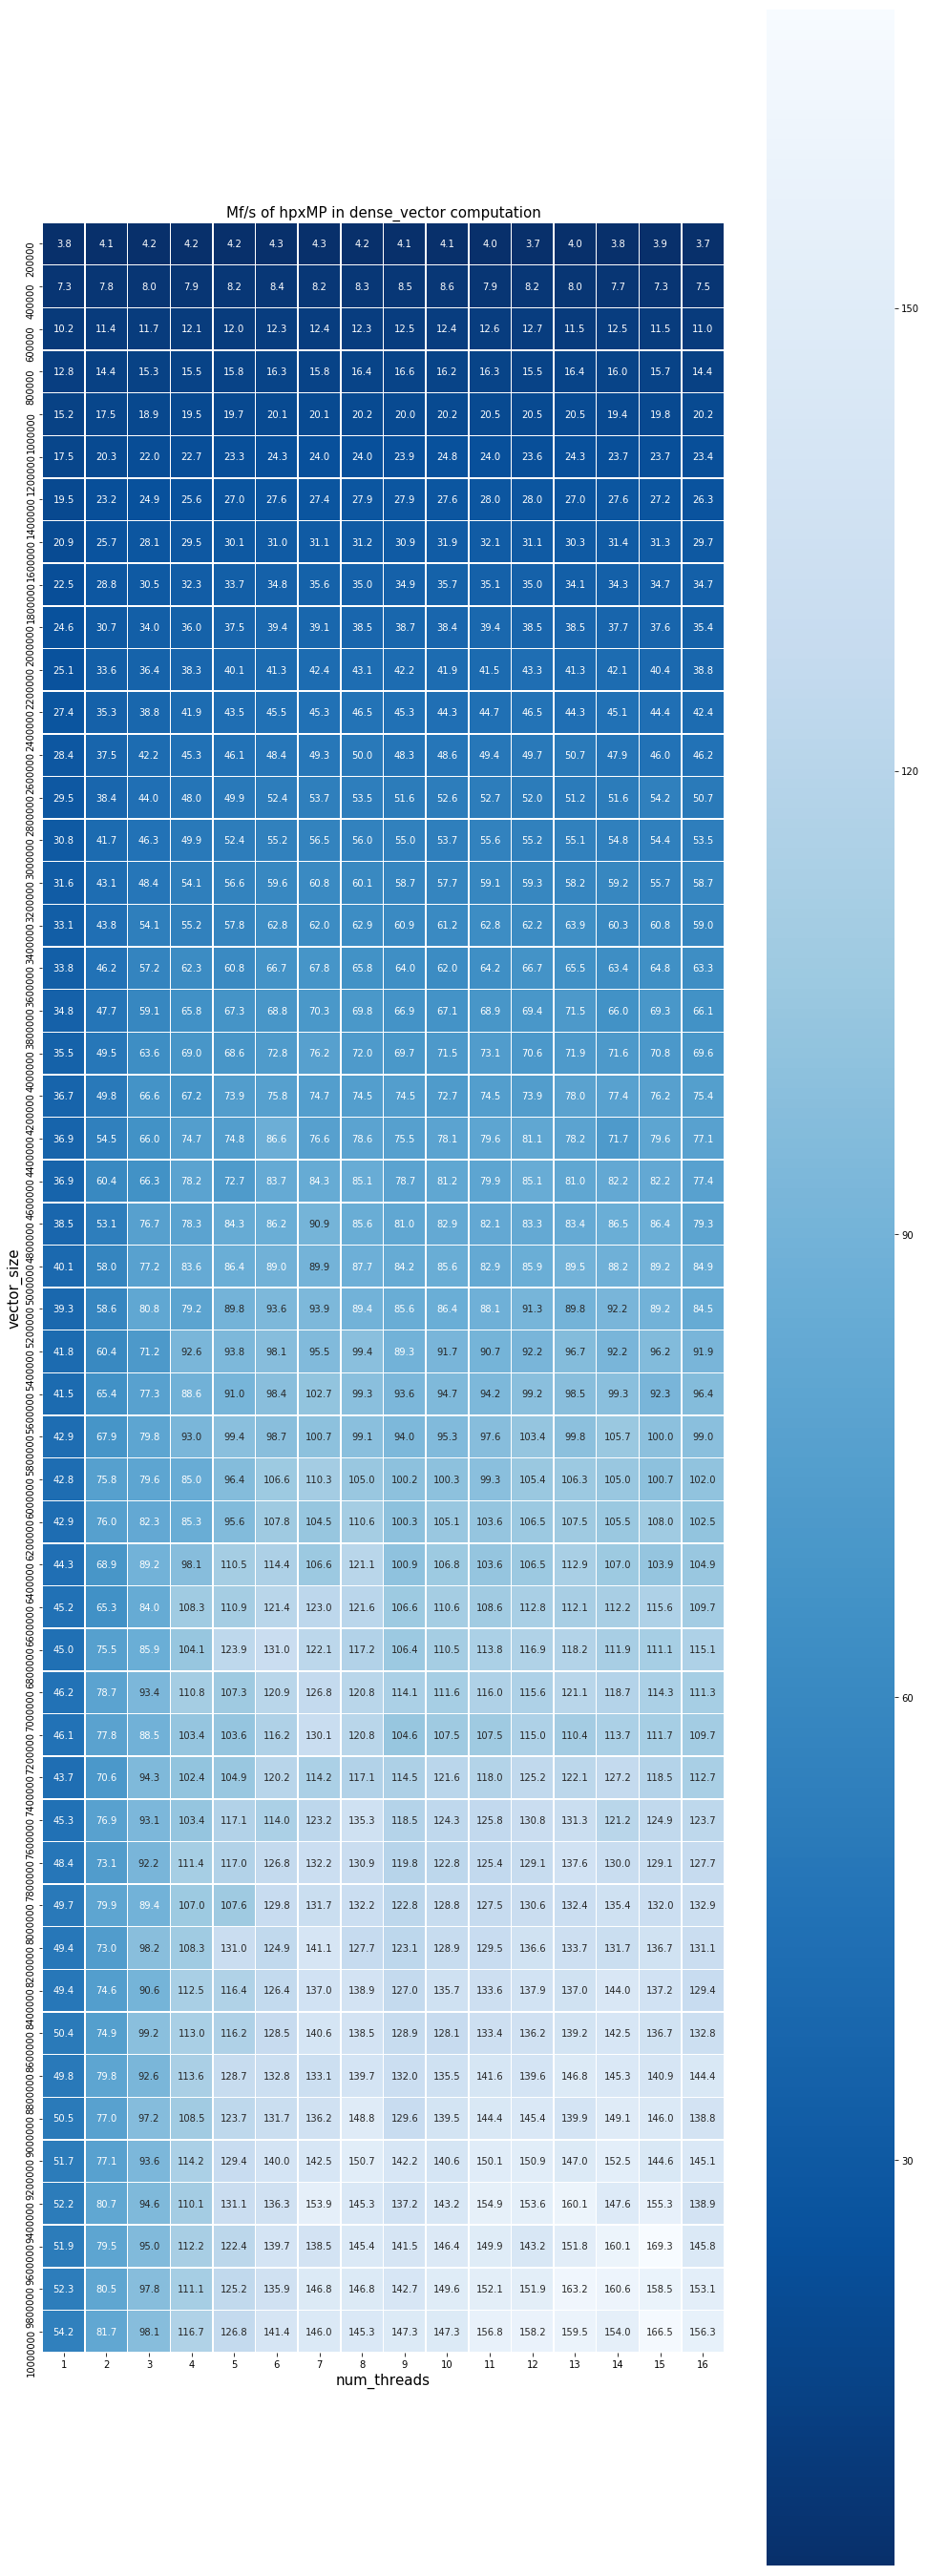

In [13]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in '+bench_name+' computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


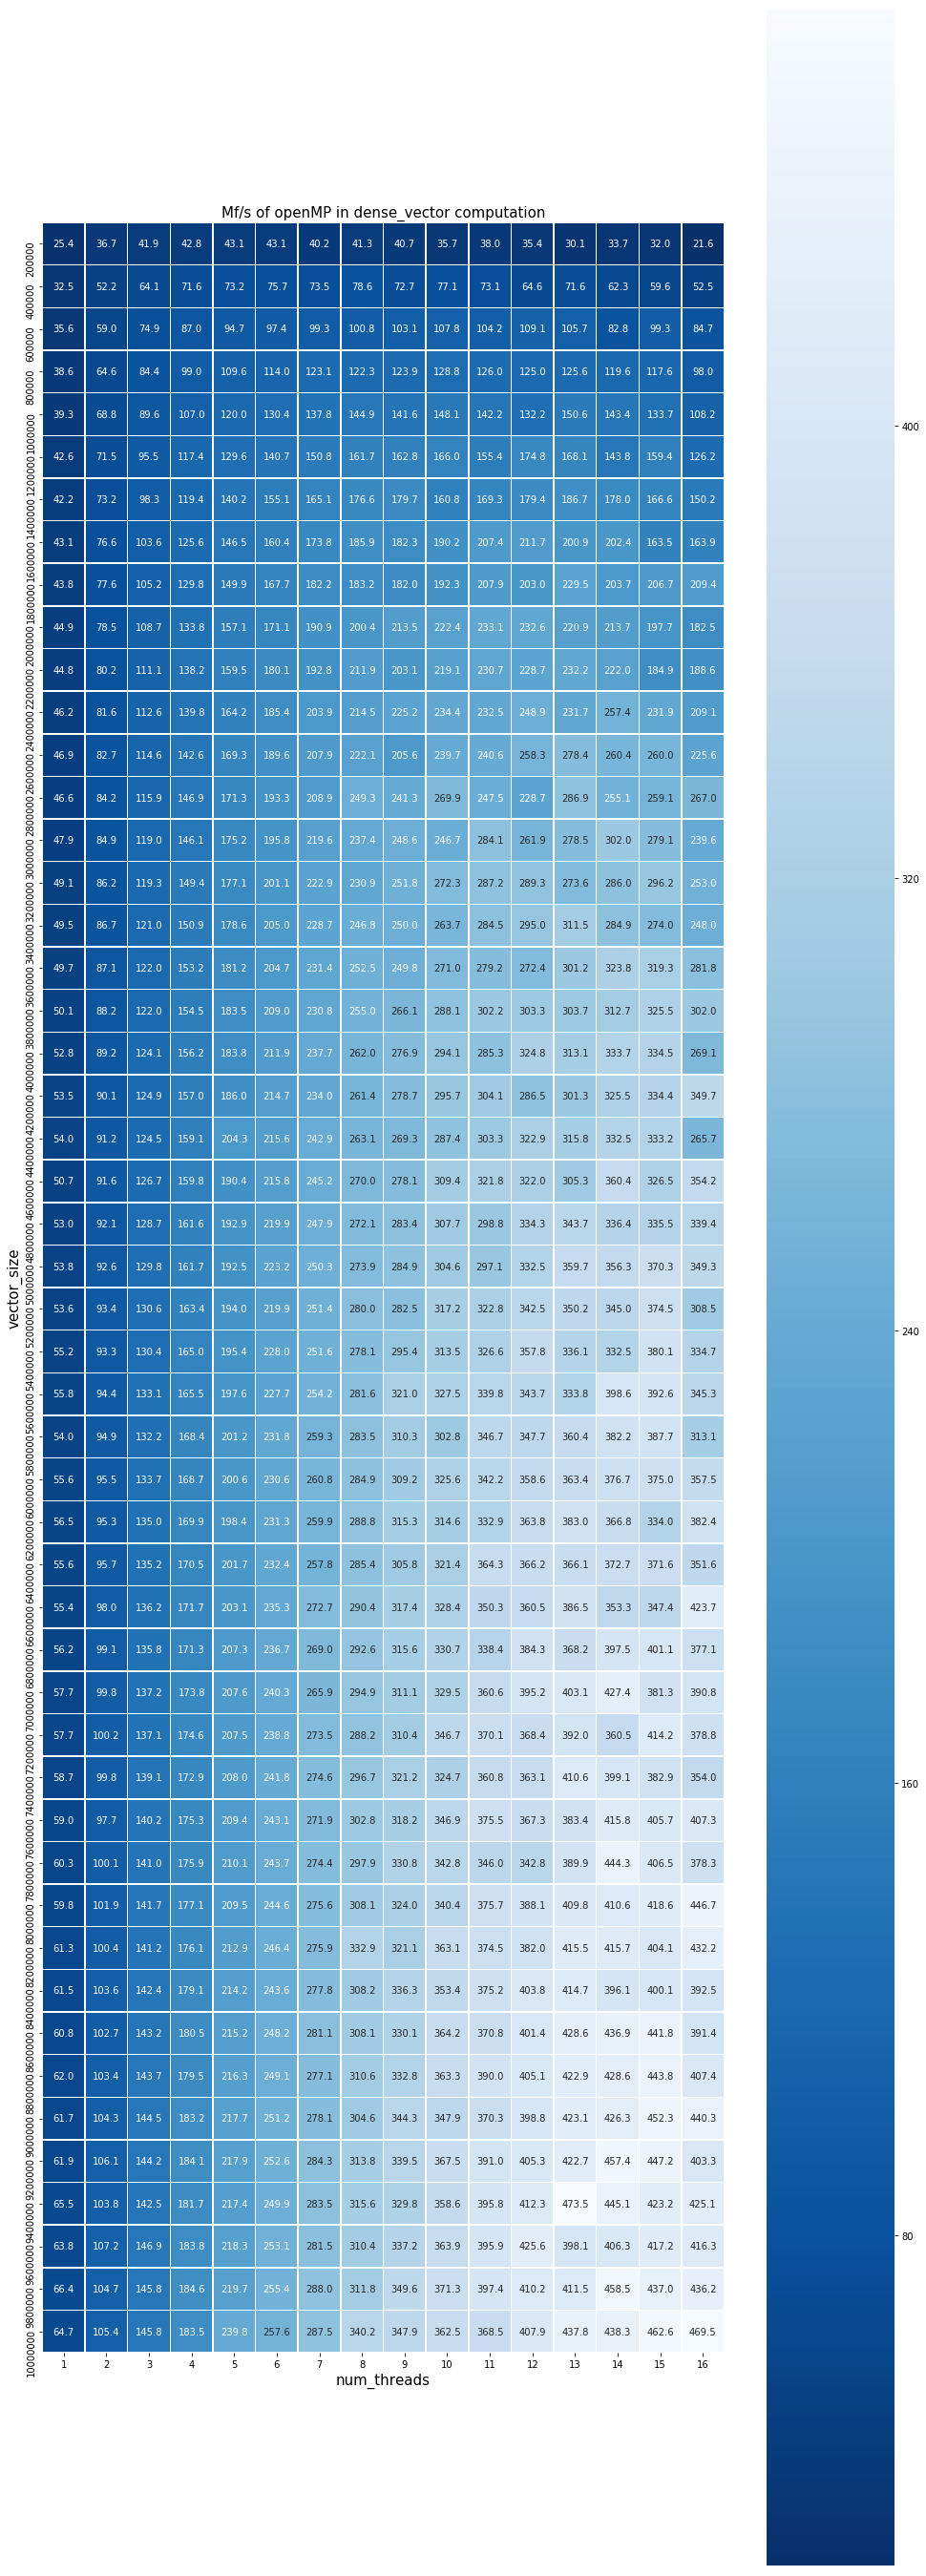

In [14]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in '+bench_name+' computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [15]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [16]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [17]:
pivot_table_diff.head(16)

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
200000,0.150684,0.111506,0.099212,0.098723,0.097208,0.098986,0.105904,0.101430,0.101564,0.115481,0.105153,0.105507,0.132745,0.113630,0.122533,0.170764
400000,0.225421,0.150047,0.125577,0.110292,0.112506,0.111354,0.112053,0.105634,0.116832,0.111007,0.108015,0.127377,0.112315,0.122891,0.123070,0.142893
600000,0.286847,0.193336,0.156605,0.138606,0.126301,0.126268,0.124503,0.122386,0.120846,0.114563,0.120740,0.116775,0.108321,0.150576,0.115482,0.129338
800000,0.332371,0.223458,0.180944,0.157022,0.144149,0.143351,0.127917,0.134124,0.134146,0.125980,0.129094,0.124196,0.130882,0.133814,0.133652,0.146704
1000000,0.386140,0.254926,0.210708,0.182358,0.164111,0.154129,0.145854,0.139381,0.141172,0.136585,0.144037,0.154923,0.136187,0.135546,0.147851,0.186621
1200000,0.410069,0.283553,0.230296,0.193119,0.180090,0.172723,0.159013,0.148111,0.147104,0.149227,0.154198,0.135147,0.144596,0.164563,0.148882,0.185302
1400000,0.461844,0.317071,0.253607,0.214247,0.192477,0.177711,0.166026,0.157864,0.155385,0.171882,0.165475,0.156017,0.144485,0.155272,0.163289,0.175213
1600000,0.486049,0.335707,0.270967,0.234927,0.205279,0.193229,0.179008,0.168056,0.169541,0.167801,0.154996,0.147072,0.150806,0.155322,0.191316,0.181182
1800000,0.512452,0.370983,0.290192,0.249014,0.224674,0.207579,0.195488,0.191196,0.191735,0.185386,0.168943,0.172425,0.148485,0.168596,0.167875,0.165515


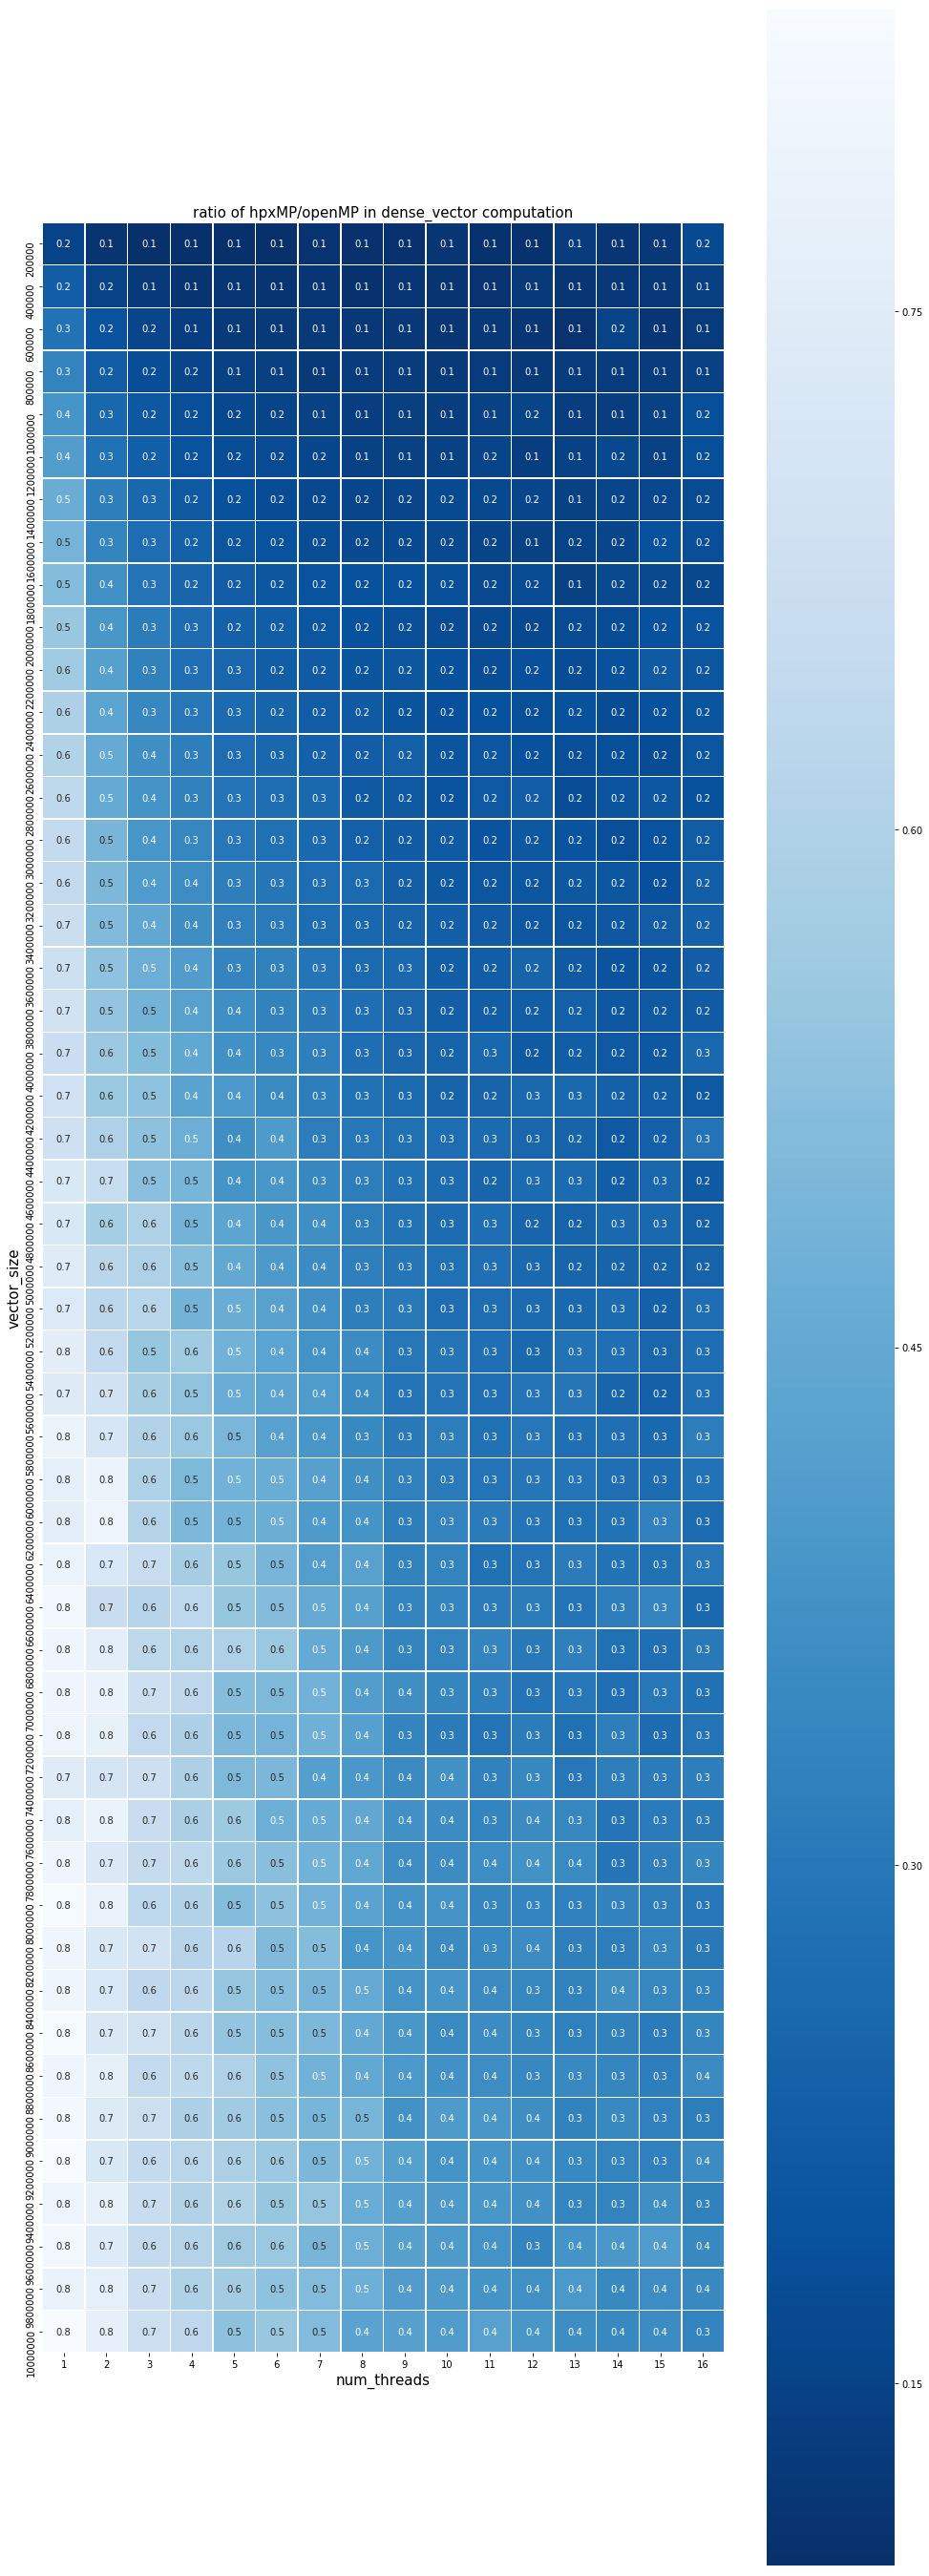

In [18]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in '+bench_name+' computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [19]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")